In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# read data
anom = np.load('anomaly_samples.npy',allow_pickle=True).astype(np.float64)
norm = np.load('normal_samples.npy',allow_pickle = True).astype(np.float64)

D:\miniconda3\envs\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\miniconda3\envs\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
D:\miniconda3\envs\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\miniconda3\envs\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


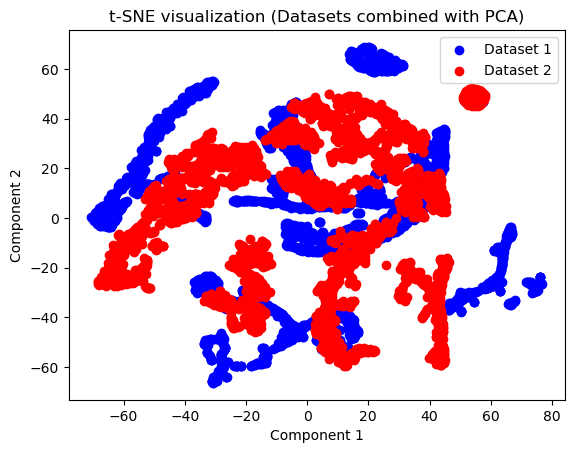

In [20]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sample data (replace with your actual datasets)
data1 = norm[1:3000]
data2 = anom[1:3000]  # 200 data points, 7 features (dataset 2)

# Standardize features for each dataset independently
scaler1 = StandardScaler()
scaler2 = StandardScaler()
data1_scaled = scaler1.fit_transform(data1)
data2_scaled = scaler2.fit_transform(data2)

# Apply t-SNE to each scaled dataset (adjust parameters as needed)
perplexity = 30  # Adjust perplexity based on your data
tsne1 = TSNE(n_components=2, perplexity=perplexity)
tsne2 = TSNE(n_components=2, perplexity=perplexity)
data1_embedded = tsne1.fit_transform(data1_scaled)
data2_embedded = tsne2.fit_transform(data2_scaled)

# Combine and perform PCA (optional, for centering and reducing to 2D)
data_combined = np.vstack((data1_embedded, data2_embedded))
pca = PCA(n_components=2)
data_combined_pca = pca.fit_transform(data_combined)

# Separate data for plotting based on origin
data1_pca = data_combined_pca[:3000]  # Assuming first 100 points belong to dataset 1
data2_pca = data_combined_pca[3000:]

# Create the scatter plot
plt.scatter(data1_pca[:, 0], data1_pca[:, 1], label='Dataset 1', c='blue')
plt.scatter(data2_pca[:, 0], data2_pca[:, 1], label='Dataset 2', c='red')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE visualization (Datasets combined with PCA)')
plt.legend()
plt.show()

In [14]:
data1_embedded


array([[ 2.9061644e+00, -3.6315241e+00],
       [ 1.2982893e+00, -5.0508199e+00],
       [-3.2566507e+00, -6.3217540e+00],
       [-5.1401324e+00, -6.1346326e+00],
       [-7.6695294e+00, -5.1976509e+00],
       [ 2.1820652e+00, -5.6081548e+00],
       [-4.4555368e+00, -3.4485137e+00],
       [ 1.9919363e+00, -2.7172542e+00],
       [-4.4994040e+00, -2.0000417e+00],
       [-4.5197172e+00, -1.1182085e+01],
       [ 1.8269114e+00, -6.0797477e+00],
       [-3.7645154e+00, -3.3929420e+00],
       [-2.3272395e+00, -3.4447937e+00],
       [-5.9595761e+00, -3.5160518e+00],
       [-7.3368287e+00, -8.0655737e+00],
       [-1.3691771e+00, -7.4565020e+00],
       [-6.8578806e+00, -8.5309696e+00],
       [ 2.7536218e+00, -2.3416979e+00],
       [ 1.7838459e-01, -3.9390695e+00],
       [ 1.3505837e+00, -9.9185544e-01],
       [ 3.5891442e+00, -4.1865129e+00],
       [-6.7006960e+00, -1.0492132e+01],
       [-4.1738381e+00, -1.8074131e+00],
       [-2.1449571e+00, -8.0530596e+00],
       [-5.33041